In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('energy_demand.csv',index_col = [0], parse_dates = True)
df.head(10)

,demand,price,demand_pos_price,price_positive,demand_neg_price,price_negative,frac_neg_price,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
date,,,,,,,,,,,,,
2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N
2015-01-06,130672.485,31.282311,130672.485,31.282311,0.000,0.000000,0.000000,17.7,26.0,31.6,0.0,N,N
2015-01-07,153514.820,48.312309,149498.715,49.639712,4016.105,-1.100000,0.020833,18.9,37.4,20.7,0.0,N,N
2015-01-08,142015.655,49.117280,142015.655,49.117280,0.000,0.000000,0.000000,23.1,28.2,13.5,19.4,N,N
2015-01-09,121801.155,34.490675,121801.155,34.490675,0.000,0.000000,0.000000,16.5,18.0,3.1,1.2,N,N


In [3]:
df.tail(6)

,demand,price,demand_pos_price,price_positive,demand_neg_price,price_negative,frac_neg_price,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
date,,,,,,,,,,,,,
2020-10-01,106641.790,34.654671,95349.610,41.651658,11292.180,-24.426925,0.125000,9.4,19.5,21.2,1.8,N,N
2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N
2020-10-06,122607.560,75.771059,122607.560,75.771059,0.000,0.000000,0.000000,8.9,12.6,5.8,1.0,N,N


In [4]:
df.shape

(2106, 13)

In [5]:
df.isnull().sum()

demand              0
price               0
demand_pos_price    0
price_positive      0
demand_neg_price    0
price_negative      0
frac_neg_price      0
min_temperature     0
max_temperature     0
solar_exposure      1
rainfall            3
school_day          0
holiday             0
dtype: int64

-checking for outliers because it is necessary to detect and get rid of outliers before modelling a dataset. -we will implement IQR method to detect and treat outliers. -IQR is equivalent to the difference between the first quartile (Q1) and the third quartile (Q3) respectively. -Here, Q1 refers to the first quartile i.e. 25% and Q3 refers to the third quartile i.e. 75%.

In [6]:
## Further, we have segregated the variables into numeric and categorical values.


numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variabes \n'.format(len(numerical)))

print('They are: ', numerical)

There are 11 numerical variabes 

They are:  ['demand', 'price', 'demand_pos_price', 'price_positive', 'demand_neg_price', 'price_negative', 'frac_neg_price', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']


<AxesSubplot:>

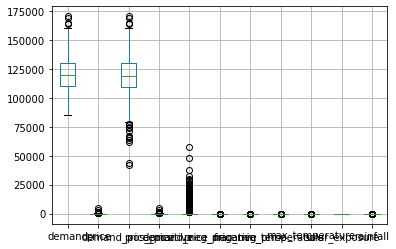

In [7]:
## We will be using Boxplots to detect and visualize the outliers present in the dataset.

df.boxplot(numerical)

In [8]:
##removing the columns that are not needed from the dataset.

remove = ('demand_pos_price', 'price_positive', 'demand_neg_price', 'price_negative', 'frac_neg_price', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall', 'school_day', 'holiday')
df = df[df.columns.difference(remove)]
df.head(10)

,demand,price
date,,
2015-01-01,99635.030,25.633696
2015-01-02,129606.010,33.138988
2015-01-03,142300.540,34.564855
2015-01-04,104330.715,25.005560
2015-01-05,118132.200,26.724176
2015-01-06,130672.485,31.282311
2015-01-07,153514.820,48.312309
2015-01-08,142015.655,49.117280
2015-01-09,121801.155,34.490675


In [9]:
numer_col =  [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variabes \n'.format(len(numer_col)))

print('They are: ', numer_col)

There are 2 numerical variabes 

They are:  ['demand', 'price']


<AxesSubplot:>

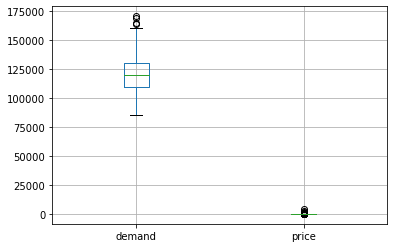

In [10]:
## Using Boxplots to detect and visualize the outliers present in the needed columns

df.boxplot(numer_col)

as discussed above, outliers are the data points that lie away from the usual distribution of the data and causes the below effects on the overall data distribution:

Affects the overall standard variation of the data. Manipulates the overall mean of the data. Converts the data to a skewed form. It causes bias in the accuracy estimation of the machine learning model. Affects the distribution and statistics of the dataset.

In [11]:
# ''' Detection '''
# IQR
Q1 = np.percentile(df['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 

Old Shape:  (2106, 2)


In [12]:
for x in ['price']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan  ## we have replaced the outliers with numpy.nan as the NULL values.
    df.loc[df[x] > max,x] = np.nan

In [13]:
df.isnull().sum()

demand     0
price     28
dtype: int64

In [14]:
## filling the missing data with median

df['price'].fillna(df['price'].median(), inplace = True)

In [15]:
# confirming the missing data info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2015-01-01 to 2020-10-06
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   demand  2106 non-null   float64
 1   price   2106 non-null   float64
dtypes: float64(2)
memory usage: 49.4 KB


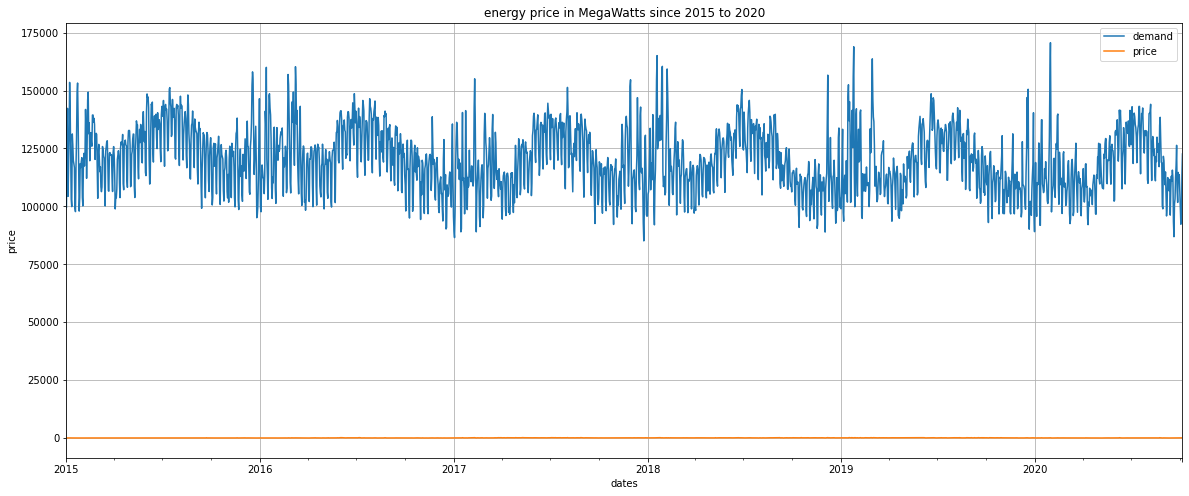

In [16]:
df.plot(figsize = (20,8))
plt.title('energy price in MegaWatts since 2015 to 2020')
plt.xlabel('dates')
plt.ylabel('price')
plt.grid();

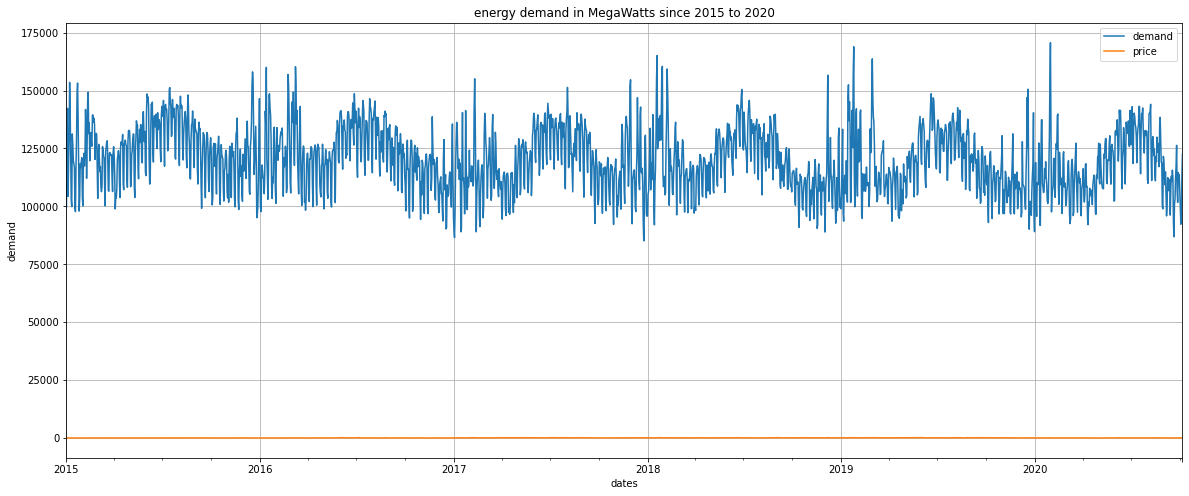

In [17]:
df.plot(figsize = (20,8))
plt.title('energy demand in MegaWatts since 2015 to 2020')
plt.xlabel('dates')
plt.ylabel('demand')
plt.grid();

In [18]:
## checking the full description of the data but rounded to 3 decimal place

round(df.describe(), 3)

,demand,price
count,2106.000,2106.000
mean,120035.477,68.499
std,13747.994,34.198
min,85094.375,-6.076
25%,109963.650,38.707
50%,119585.912,65.741
75%,130436.006,93.345
max,170653.840,178.080


In [19]:
df_demand = df.groupby('date')[['demand']].mean()
df_demand

,demand
date,
2015-01-01,99635.030
2015-01-02,129606.010
2015-01-03,142300.540
2015-01-04,104330.715
2015-01-05,118132.200
...,...
2020-10-02,99585.835
2020-10-03,92277.025
2020-10-04,94081.565


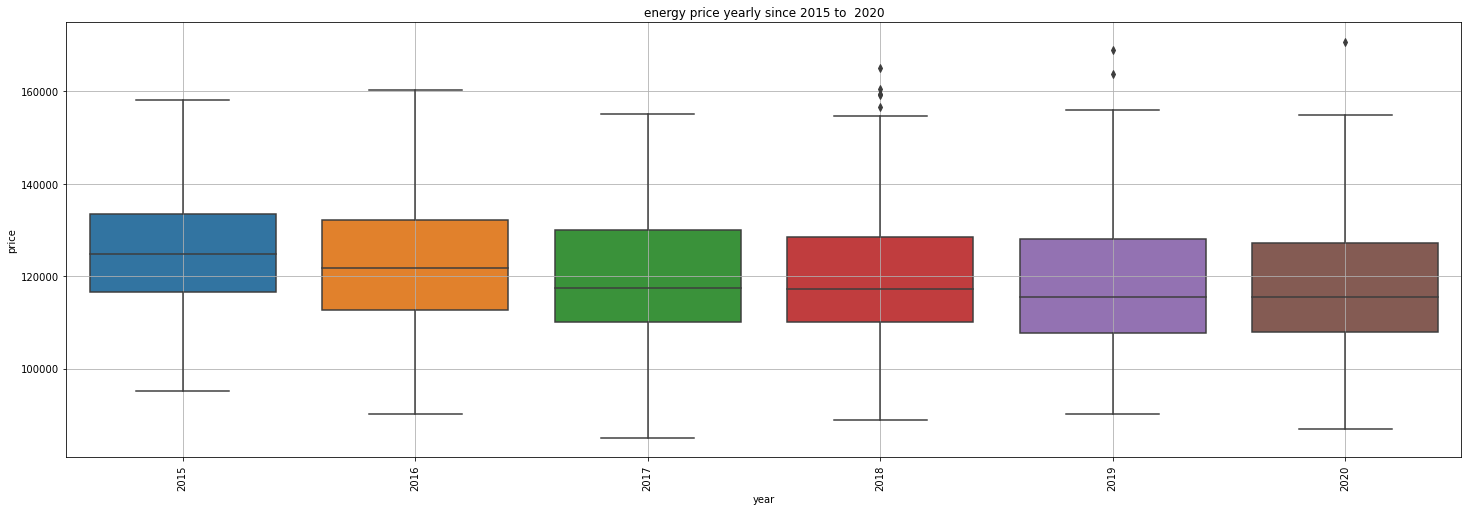

In [20]:
_, ax =  plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y= df.values[:,0], ax = ax)
plt.title('energy price yearly since 2015 to  2020')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid();

In [21]:
df.drop('demand', axis = 1, inplace = True)
df.head(6)

,price
date,
2015-01-01,25.633696
2015-01-02,33.138988
2015-01-03,34.564855
2015-01-04,25.005560
2015-01-05,26.724176
2015-01-06,31.282311


In [22]:
from statsmodels.graphics.tsaplots import month_plot

In [23]:
month_plot = df.groupby(df.index.month)[['price']].mean()
month_plot

,price
date,
1,62.321411
2,64.578945
3,64.249325
4,66.740784
5,69.272424
6,80.605765
7,75.476441
8,71.006129
9,67.874707


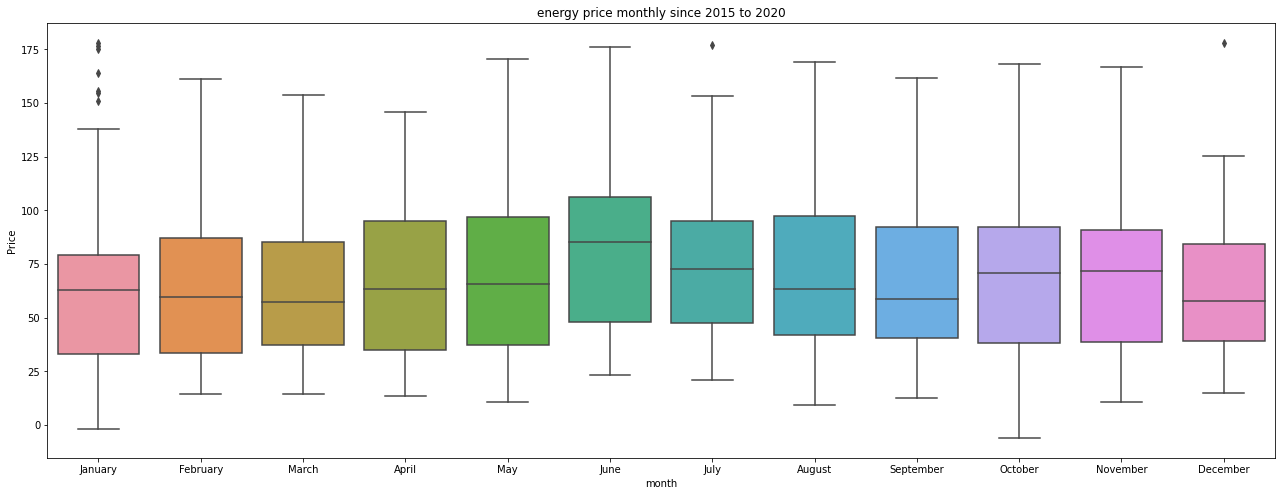

In [24]:
_, ax =  plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y= df.values[:, 0], ax=ax)
plt.title('energy price monthly since 2015 to 2020')
plt.xlabel('month')
plt.ylabel('Price')
plt.show();

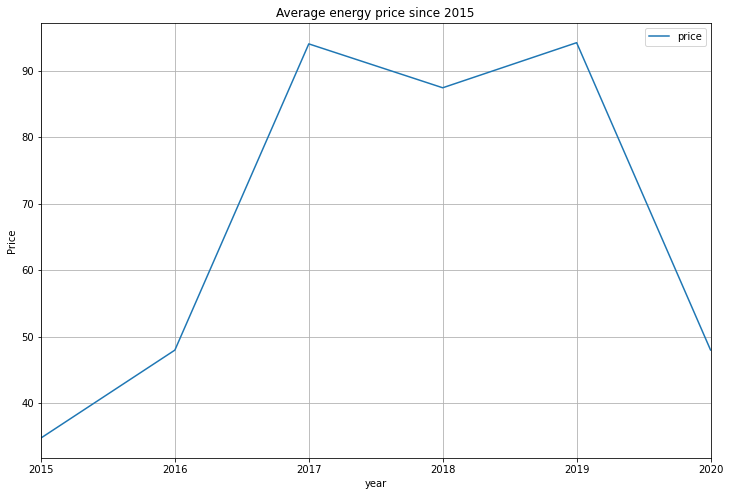

In [25]:
df_yearly_sum = df.resample('A').mean()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8)) # Increase the figure size here
df_yearly_sum.plot(ax=ax)

plt.title('Average energy price since 2015')
plt.xlabel('year')
plt.ylabel('Price')
plt.grid();

In [26]:
df1 = df.groupby(df.index.year).mean()
df1.columns = [['Mean']]

df_2 =df.groupby(df.index.year).std()
df_2.columns = [['Std']]

print(df1)

print(df_2)

           Mean
date           
2015  34.732943
2016  47.956388
2017  94.009527
2018  87.408074
2019  94.188555
2020  47.971757
            Std
date           
2015  11.821222
2016  27.320118
2017  25.879435
2018  22.475619
2019  28.881857
2020  19.826575


In [27]:
grouped_df = df.groupby(df.index.year)["price"].agg(["mean", "std"]).assign(cv_pct=lambda x: x["std"] / x["mean"])*100
grouped_df

,mean,std,cv_pct
date,,,
2015,3473.294284,1182.122237,34.034612
2016,4795.638832,2732.011785,56.968673
2017,9400.952725,2587.943463,27.528523
2018,8740.807359,2247.561907,25.713436
2019,9418.855496,2888.185727,30.663871
2020,4797.175694,1982.657534,41.329684


In [28]:
dwt =grouped_df.groupby('date')[['cv_pct']].mean()
dwt

,cv_pct
date,
2015,34.034612
2016,56.968673
2017,27.528523
2018,25.713436
2019,30.663871
2020,41.329684


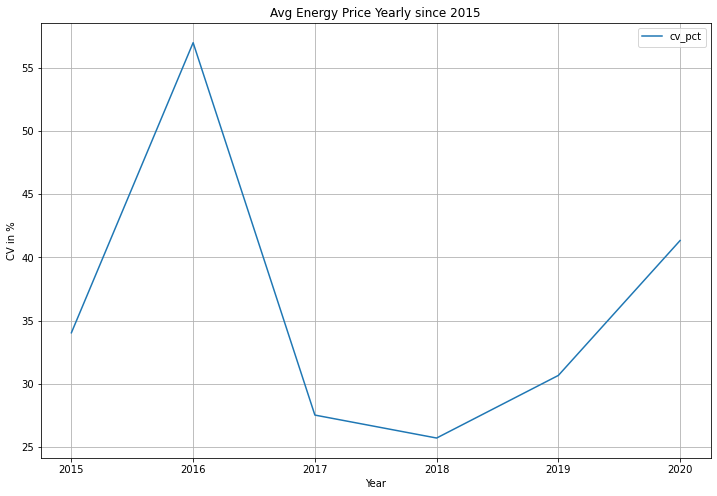

In [29]:
# Group the data by year and calculate the mean cv_pct
dwt =grouped_df.groupby('date')[['cv_pct']].mean()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8)) # Increase the figure size here
dwt.plot(ax=ax)

# Set the title, x-label, y-label, and grid
plt.title('Avg Energy Price Yearly since 2015')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()

In [30]:
from sklearn.model_selection import train_test_split
df_train = df[0:1806]
df_test = df[1806:2107]

print(df_train.shape)
print(df_test.shape)

(1806, 1)
(300, 1)


In [31]:
## creating a time series forcast model

train = df[df.index.year <= 2018]
test = df[df.index.year > 2018]

print(train.shape)
print(test.shape)

(1461, 1)
(645, 1)


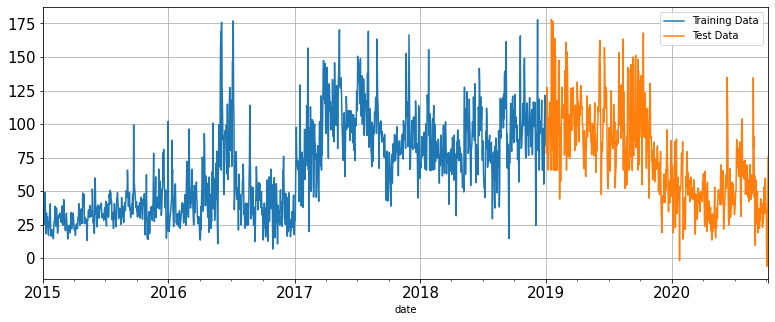

In [32]:
train['price'].plot(figsize = (13,5), fontsize = 15)
test['price'].plot(figsize = (13,5), fontsize = 15)
plt.legend(['Training Data', 'Test Data'])
plt.grid();
plt.show()

In [33]:
## model formation... well do 2 models
## first we'll go for linear regression

train_time = [i+1 for i in range(len(train))] 
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(1461, 645)

In [34]:
LR_train = train.copy()
LR_test = test.copy()

In [35]:
LR_train['time'] = train_time
LR_test['time'] = test_time

lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['price'].values)

LinearRegression()

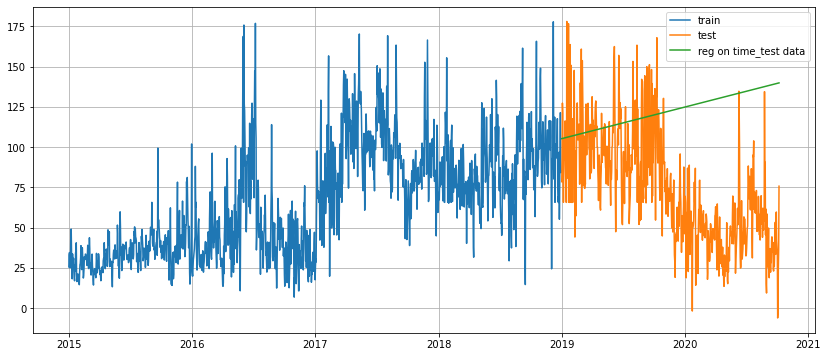

In [36]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forcast'] = test_predictions_model1

plt.figure(figsize = (14, 6))
plt.plot(train['price'], label = 'train')
plt.plot(test['price'], label = 'test')
plt.plot(LR_test['forcast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid();

In [37]:
## we are going to find the MAPE of the dataset

def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/ actual))*100, 2)

In [38]:
mape_model1_test = mape(test['price'].values,test_predictions_model1)
print('MAPE is %3.3f'%(mape_model1_test), "%" )

MAPE is 95.250 %


In [39]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index = ['RegressionOnTime'])
results

,Test Mape (%)
RegressionOnTime,95.25


In [40]:
## DOING THE SAME STEPS ALL OVER AGAIN with another model called NAIVE

Naive_train = train.copy()
Naive_test = test.copy()

Naive_test['naive'] = np.asarray(train['price'])[len(np.asarray(train['price']))-1]
Naive_test[['naive']].head()

,naive
date,
2019-01-01,84.897997
2019-01-02,84.897997
2019-01-03,84.897997
2019-01-04,84.897997
2019-01-05,84.897997


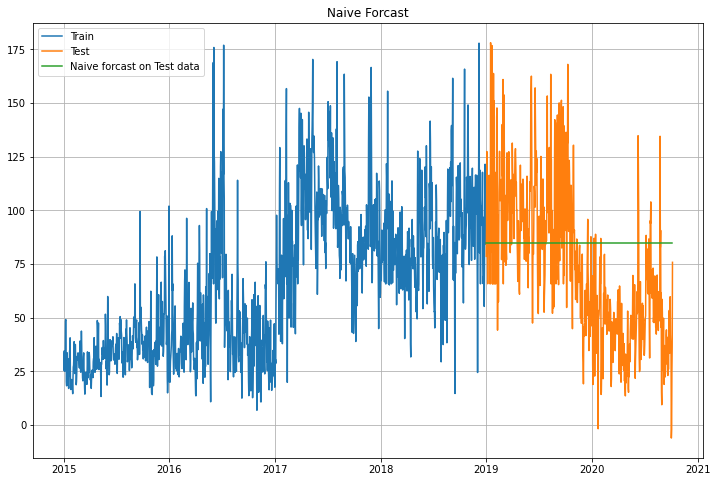

In [41]:
plt.figure(figsize = (12, 8))
plt.plot(Naive_train['price'], label = 'Train')
plt.plot(test['price'], label = 'Test')
plt.plot(Naive_test['naive'], label = 'Naive forcast on Test data')
plt.legend(loc = 'best')
plt.title('Naive Forcast')
plt.grid();

In [42]:
mape_model2_test = mape(test['price'].values, Naive_test['naive'].values)
print('for Naive forcast on the Test Data', 'MAPE is %3.3f'%(mape_model2_test), "%" )

for Naive forcast on the Test Data MAPE is 45.580 %


In [43]:
results_naive = pd.DataFrame({'Test MAPE(%)': [mape_model2_test]}, index = ['NaiveModel'])
results = pd.concat([results, results_naive])
results

,Test Mape (%),Test MAPE(%)
RegressionOnTime,95.25,NaN
NaiveModel,NaN,45.58


In [44]:
## FINAL FORECASTING

final_model = ExponentialSmoothing(df,
                                  trend = 'additive',
                                  seasonal = 'additive').fit(smoothing_level = 0.4,
                                                            smoothing_trend = 0.3,
                                                            smoothing_seasonal = 0.6)

In [45]:
Mape_final_model = mape(df['price'].values, final_model.fittedvalues)
print('Mape:', Mape_final_model)

Mape: 33.51


In [46]:
df

,price
date,
2015-01-01,25.633696
2015-01-02,33.138988
2015-01-03,34.564855
2015-01-04,25.005560
2015-01-05,26.724176
...,...
2020-10-02,-6.076028
2020-10-03,-1.983471
2020-10-04,25.008614


In [47]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [63]:
df_diff = df.diff(periods=1).dropna()
df_diff

,price
date,
2015-01-02,7.505291
2015-01-03,1.425867
2015-01-04,-9.559295
2015-01-05,1.718616
2015-01-06,4.558134
...,...
2020-10-02,-40.730699
2020-10-03,4.092558
2020-10-04,26.992084


In [49]:
# Set the seasonal and non-seasonal orders
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Fit the SARIMA model
model = SARIMAX(df_diff, order=order, seasonal_order=seasonal_order, trend='ct')
results = model.fit()

In [50]:
# Forecast future salaries for 36 months
forecast = results.get_forecast(steps=36)

# Extract the forecasted salaries and their standard errors
forecast_values = forecast.predicted_mean
forecast_errors = forecast.se_mean

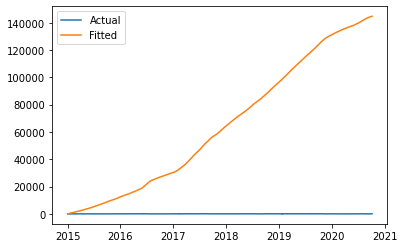

In [70]:
# Plot the original salary data

plt.plot(df.index, df['price'], label='Actual')

# Plot the fitted model
plt.plot(df_diff.index, results.fittedvalues[1:].cumsum(), label='Fitted')


plt.legend()
plt.show()

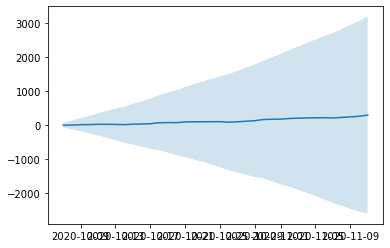

In [71]:
# Plot the forecasted salaries
plt.plot(forecast_values.index, forecast_values.cumsum(), label='Forecast')

# Add confidence intervals to the forecast plot
plt.fill_between(forecast_values.index,
                 (forecast_values - 1.96 * forecast_errors).cumsum(),
                 (forecast_values + 1.96 * forecast_errors).cumsum(),
                 alpha=0.2)

In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              price   No. Observations:                 2105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -9829.367
Date:                            Mon, 03 Apr 2023   AIC                          19672.735
Time:                                    21:35:23   BIC                          19712.256
Sample:                                01-02-2015   HQIC                         19687.213
                                     - 10-06-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0308      0.193     -0.159      0.874      -0.410       0.348
drift       1.968e-05      0.000      0.132      0.895      -0.000       0.000
ar.L1          0.0111      0.036      0.310      0.756      -0.059       0.081
ma.L1         -0.8796      0.043    -20.564      0.000      -0.963      -0.796
ar.S.L12      -0.3981      0.041     -9.669      0.000      -0.479      -0.317
ma.S.L12      -0.3593      0.043     -8.450      0.000      -0.443      -0.276
sigma2      1081.5256     42.578     25.401      0.000     998.074    1164.977
===================================================================================
Ljung-Box (L1) (Q):                 126.84   Jarque-Bera (JB):               949.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.13   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
df

,price
date,
2015-01-01,25.633696
2015-01-02,33.138988
2015-01-03,34.564855
2015-01-04,25.005560
2015-01-05,26.724176
...,...
2020-10-02,-6.076028
2020-10-03,-1.983471
2020-10-04,25.008614


In [58]:
from statsmodels.tsa.arima.model import ARIMA

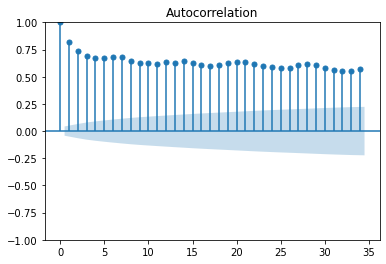

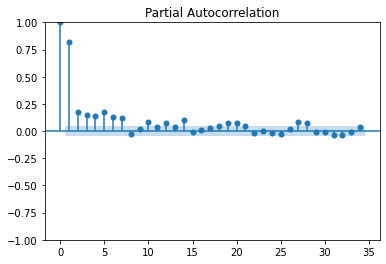

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df)
plot_pacf(df)
plt.show()

In [59]:
model = ARIMA(df, order=(1,1,1), seasonal_order=(1,1,0,12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             price   No. Observations:                 2106
Model:             ARIMA(1, 1, 1)x(1, 1, [], 12)   Log Likelihood               -9433.372
Date:                           Mon, 03 Apr 2023   AIC                          18874.744
Time:                                   21:44:42   BIC                          18897.329
Sample:                               01-01-2015   HQIC                         18883.018
                                    - 10-06-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.014     37.679      0.000       0.517       0.574
ma.L1         -1.0000      0.071    -14.102